In [1]:
pip install h5py pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
import h5py
import numpy as np

# Global variables to hold the dataset
train_images = None
train_labels = None
test_images = None
test_labels = None

def initialize_datasets(train_file_path, test_file_path, images_dataset_name, labels_dataset_name):
    """
    Load training and testing datasets from HDF5 files and store them in global variables.

    Args:
        train_file_path (str): Path to the training HDF5 file.
        test_file_path (str): Path to the testing HDF5 file.
        images_dataset_name (str): Name of the dataset containing images.
        labels_dataset_name (str): Name of the dataset containing labels.
    """
    global train_images, train_labels, test_images, test_labels
    
    try:
        # Load training data
        with h5py.File(train_file_path, 'r') as file:
            train_images = np.array(file[images_dataset_name])
            train_labels = np.array(file[labels_dataset_name])
        print("Training dataset loaded successfully.")
        
        # Load testing data
        with h5py.File(test_file_path, 'r') as file:
            test_images = np.array(file[images_dataset_name])
            test_labels = np.array(file[labels_dataset_name])
        print("Testing dataset loaded successfully.")
    
    except KeyError as e:
        print(f"KeyError: {e}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
FOLDER_PATH = r'C:\Users\nramy\Desktop\deeplearning\Flower\\'
TRAIN_FILE_PATH = FOLDER_PATH + 'Train.h5'
TEST_FILE_PATH = FOLDER_PATH + 'Test.h5'

# Initialize the datasets
initialize_datasets(TRAIN_FILE_PATH, TEST_FILE_PATH, 'images', 'labels')

# Print the shape of the data
if train_images is not None and train_labels is not None:
    print(f"Shape of training images: {train_images.shape}")
    print(f"Shape of training labels: {train_labels.shape}")

if test_images is not None and test_labels is not None:
    print(f"Shape of testing images: {test_images.shape}")
    print(f"Shape of testing labels: {test_labels.shape}")

if train_images is None or train_labels is None or test_images is None or test_labels is None:
    print("One or more datasets are not loaded. Please check the initialization.")


Training dataset loaded successfully.
Testing dataset loaded successfully.
Shape of training images: (2626, 128, 128, 3)
Shape of training labels: (2626,)
Shape of testing images: (120, 128, 128, 3)
Shape of testing labels: (120,)


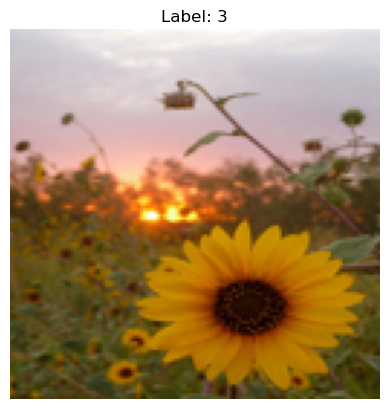

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def display_random_image(images, labels):
    """
    Display a random image from the dataset.

    Args:
        images (np.array): Array of images.
        labels (np.array): Array of labels corresponding to the images.
    """
    random_index = np.random.randint(0, len(images))
    image = images[random_index]
    label = labels[random_index]

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off') 
    plt.show()

display_random_image(train_images, train_labels)




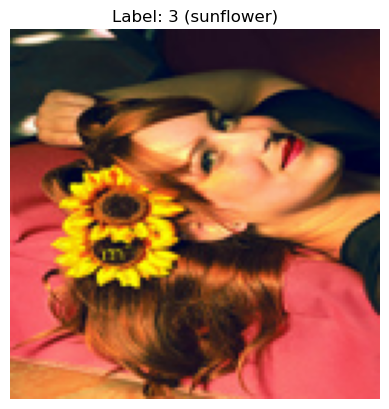

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define label names
LABEL_NAMES = {
    0: 'daisy',
    1: 'dandelion',
    2: 'rose',
    3: 'sunflower',
    4: 'tulip'
}

def display_random_image_with_random_label():
    """
    Display a random image from the dataset with a random label and its associated name.
    """
    global train_images, train_labels

    if train_images is None or train_labels is None:
        print("Data not loaded. Please ensure the data is loaded first.")
        return

    unique_labels = np.unique(train_labels)
    
    random_label = np.random.choice(unique_labels)
    
    indices = np.where(train_labels == random_label)[0]
    
    if len(indices) == 0:
        print(f"No images found for label {random_label}.")
        return
    

    random_index = np.random.choice(indices)
    image = train_images[random_index]

    plt.imshow(image, cmap='gray')  
    plt.title(f"Label: {random_label} ({LABEL_NAMES[random_label]})")
    plt.axis('off') 
    plt.show()
display_random_image_with_random_label()


In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsOneClassifier


In [95]:

train_images_flat = train_images.reshape(train_images.shape[0], -1)

scaler = StandardScaler()
train_images_flat = scaler.fit_transform(train_images_flat)


In [96]:

logistic_regression_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
ovo_classifier = OneVsOneClassifier(logistic_regression_model)
ovo_classifier.fit(train_images_flat, train_labels)


OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000,
                                                multi_class='ovr'))

In [97]:

test_images_flat = test_images.reshape(test_images.shape[0], -1)
test_images_flat = scaler.transform(test_images_flat)

test_predictions = ovo_classifier.predict(test_images_flat)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.3750


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


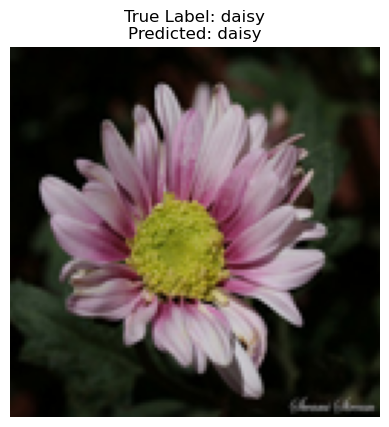

True Label: daisy
Predicted Label: daisy


In [116]:
def display_random_test_image_with_prediction(model, test_images, test_labels, scaler):
    """
    Display a random image from the test data, the model's prediction, and the true label.

    Args:
        model: Trained model for predictions.
        test_images: Array of test images.
        test_labels: Array of true labels for test images.
        scaler: Scaler used for normalizing the images.
    """
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    test_images_flat = scaler.transform(test_images_flat)

    random_index = np.random.randint(0, len(test_images))
    random_image = test_images[random_index]
    random_label = test_labels[random_index]

    random_image_flat = test_images_flat[random_index].reshape(1, -1)
    prediction = model.predict(random_image_flat)[0]

    plt.imshow(random_image, cmap='gray') 
    plt.title(f"True Label: {LABEL_NAMES[random_label]}\nPredicted: {LABEL_NAMES[prediction]}")
    plt.axis('off') 
    plt.show()

    print(f"True Label: {LABEL_NAMES[random_label]}")
    print(f"Predicted Label: {LABEL_NAMES[prediction]}")


display_random_test_image_with_prediction(ovo_classifier, test_images, test_labels, scaler)


In [104]:
def compute_rmse(true_labels, predicted_labels):
    """
    Compute the Root Mean Squared Error between true labels and predicted labels.

    Args:
        true_labels: Array of true labels.
        predicted_labels: Array of predicted labels.
    
    Returns:
        RMSE value.
    """
    rmse = np.sqrt(mean_squared_error(true_labels, predicted_labels))
    return rmse

test_predictions = ovo_classifier.predict(test_images_flat)

rmse = compute_rmse(test_labels, test_predictions)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 1.6783


## IMPLEMENTING A HAND BUILD MODEL ## 


In [117]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [119]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [121]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X)+b)                                    # compute activation
    cost = -(np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)))/m          # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (np.dot(X, (A-Y).T))/m
    db = (np.sum(A-Y))/m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [122]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        
        dw = grads["dw"]
        db = grads["db"]
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w -= learning_rate * dw
        b -=  learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [124]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X)+b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    
    return Y_prediction

In [125]:
def one_vs_rest(X, y, num_classes, learning_rate=0.01, num_iterations=1000):
    """
    Train a One-vs-Rest logistic regression model for multi-class classification.
    
    Args:
        X: Input data (num_samples, num_features).
        y: True labels (num_samples,).
        num_classes: Number of classes.
        learning_rate: Learning rate for gradient descent.
        num_iterations: Number of iterations.
    
    Returns:
        weights: Array of shape (num_features, num_classes).
        biases: Array of shape (num_classes,).
    """
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, num_classes))
    biases = np.zeros(num_classes)
    
    for i in range(num_classes):
        print(f"Training classifier for class {i}...")
        
        # Create binary labels for the current class
        y_binary = (y == i).astype(int)
        
        # Initialize weights and bias
        w, b = initialize_with_zeros(num_features)
        
        # Optimize weights and bias
        w, b = optimize(X, y_binary, w, b, learning_rate, num_iterations)
        
        # Store the trained weights and bias
        weights[:, i] = w.flatten()
        biases[i] = b
    
    return weights, biases


def predict_multi_class(X, weights, biases):
    """
    Predict the class labels for the given input data using a One-vs-Rest classifier.
    
    Args:
        X: Input data (num_samples, num_features).
        weights: Array of shape (num_features, num_classes).
        biases: Array of shape (num_classes,).
    
    Returns:
        Predicted class labels (num_samples,).
    """
    logits = np.dot(X, weights) + biases
    probabilities = sigmoid(logits)
    return np.argmax(probabilities, axis=1)



In [127]:
# Flatten and normalize the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_images_flat = scaler.fit_transform(train_images_flat)
test_images_flat = scaler.transform(test_images_flat)

# Train the OvR logistic regression model
num_classes = len(np.unique(train_labels))
weights, biases = one_vs_rest(train_images_flat, train_labels, num_classes)

# Predict on the test set
test_predictions = predict_multi_class(test_images_flat, weights, biases)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Compute RMSE (for demonstration)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Training classifier for class 0...


TypeError: 'float' object cannot be interpreted as an integer